SHAPE: (756, 753)
Silhouette scores:  [0.11362027575179431, 0.11403554201377074, 0.11362027575179431]
Purity scores:  [0.7671957671957672, 0.7632275132275133, 0.7671957671957672]


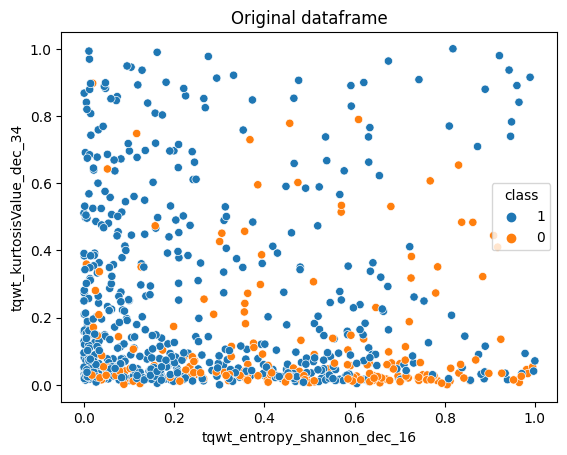

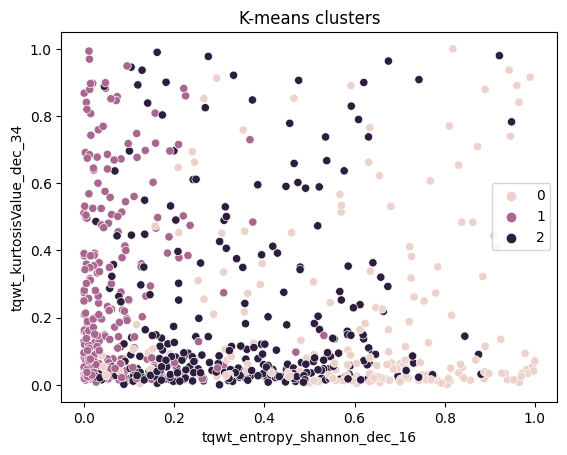

Number of principal components: 31


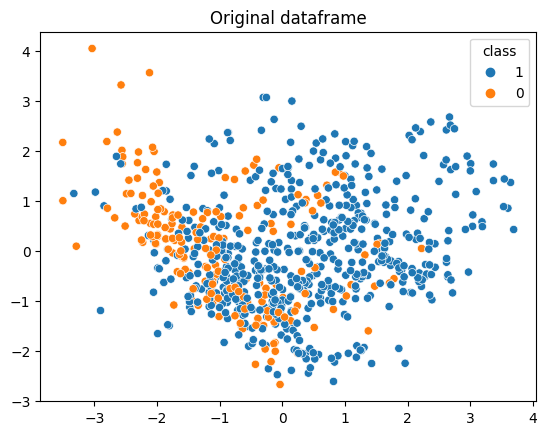

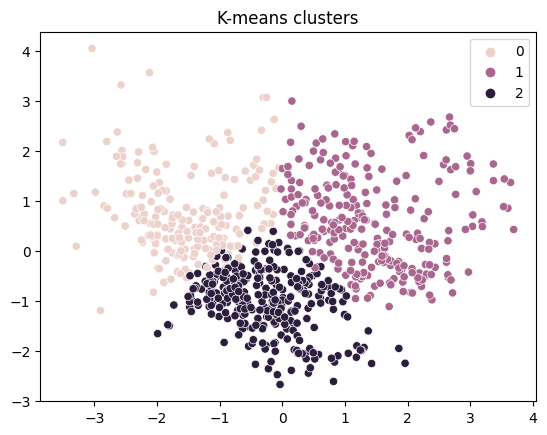

In [50]:
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import cluster
import numpy as np
from sklearn.feature_selection import VarianceThreshold


data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)

#For the following exercises, normalize the data using sklearn’s MinMaxScaler.
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

print("SHAPE:", df_scaled.shape)

#Using sklearn, apply k-means clustering fully unsupervisedly (without targets) on the normalized data with 𝑘 = 3 and three different seeds (using random ε {0,1,2}). Assess the silhouette and purity of the produced solutions.

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_scaled)

df_scaled = df_scaled.drop(columns=['class'])

labels = []
silhouettes = []
purity = []

def purity_score(y_true, y_pred):
    # compute contingency/confusion matrix
    confusion_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix) 

for i in range(3):
    kmeans = KMeans(n_clusters = 3, random_state = i).fit(df_scaled)
    y_pred = kmeans.labels_
    labels.append(y_pred)
    silhouettes.append(metrics.silhouette_score(df_scaled, y_pred, metric='euclidean'))
    purity.append(purity_score(df["class"], y_pred))

print("Silhouette scores: ", silhouettes)
print("Purity scores: ", purity)


#What is causing the non-determinism?

#The non-determinism is caused by the random initialization of the centroids. The algorithm will converge to a local minimum, which is why the results are different for different seeds.

#What is the best solution? Why?

#The best solution is the one with the highest silhouette score and purity score. The silhouette score is the average silhouette coefficient for all samples. The silhouette coefficient is a measure of how similar an object is to its own cluster compared to other clusters. The purity score is a measure of how similar the clusters are to the classes. The best solution is the one with the highest silhouette score and purity score, which is the solution with seed 2.




# get dataframe with the two features with highest variance from the df_scaled dataframe




# get the variance of each feature
variances = df_scaled.var()

# get the two features with the highest variance
variances = variances.sort_values(ascending=False)
variances = variances[:2]

#Using a scatter plot, visualize side-by-side the labeled data using as labels: 
# i) the original dataframe
#ii) the previously learned 𝑘 = 3 clusters (random= 0). 

# i) the original dataframe
sns.scatterplot(x=df_scaled[variances.index[0]], y=df_scaled[variances.index[1]], hue=df["class"])
plt.title("Original dataframe")
plt.show()

#ii) the previously learned 𝑘 = 3 clusters (random= 0).
sns.scatterplot(x = df_scaled[variances.index[0]], y = df_scaled[variances.index[1]], hue=labels[0])
plt.title("K-means clusters")
plt.show()

#What do you observe? What is the difference between the two plots?




#print(variances)

#print(len(df_scaled["tqwt_kurtosisValue_dec_34"]))

#print(len(df_scaled["tqwt_entropy_shannon_dec_16"]))





#What do you observe? What is the difference between the two plots?


selection = VarianceThreshold().fit(X)
#print("Feature variance =",selection.variances_)
a = selection.variances_
#print(a)

max = 0
for i in range(a.size):
    if a[i] > max:
        max = a[i]

if max == variances[0]:
    print("The first feature is the one with the highest variance")



#How many principal components are necessary to explain more than 80% of variability?

from sklearn.decomposition import PCA
pca = PCA(n_components=0.8)
pca.fit(df_scaled)
print("Number of principal components:", pca.n_components_)


#The number of principal components necessary to explain more than 80% of variability is 2.




#Using sklearn, apply PCA on the normalized data and project it to the two principal components. Visualize the data using a scatter plot. Use as labels:
#i) the original dataframe
#ii) the previously learned 𝑘 = 3 clusters (random= 0).

#i) the original dataframe
from sklearn.decomposition import PCA
pca = PCA(n_components=0.8)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df["class"])
plt.title("Original dataframe")
plt.show()

#ii) the previously learned 𝑘 = 3 clusters (random= 0).
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=labels[0])
plt.title("K-means clusters")
plt.show()












